Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re     #Regular expression library --> useful for searching words in a text or paragraph
from nltk.corpus import stopwords #Natural language tool kit   stopwards--->words which does not give a value to pargraph or text
from nltk.stem.porter import PorterStemmer   #gives us rootword for a particular word
from sklearn.feature_extraction.text import TfidfVectorizer  # text into feature vexctors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns



About The dataset

     id: unique id for a news article
     title: the title of a news article
     author: author of the news article
     text: the text of the article; could be incomplete
     label: a label that marks the article as potentially unreliable
    1 : Fake news
    0 : Real news

Data Pre-processing

In [ ]:
dataset = pd.read_csv("//content/train.csv.zip")

In [ ]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
dataset.shape

(20800, 5)

In [ ]:
# total number of missing values in the dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#null values are replaced by empty string
dataset = dataset.fillna("")

In [ ]:

dataset["new_data"] = dataset["author"]+" "+dataset["title"]

In [ ]:
print(dataset.new_data)

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: new_data, Length: 20800, dtype: object


In [ ]:


X = dataset.drop(columns="label", axis=1)

Y = dataset["label"]

print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

eg:
    actor,actress,acting ----> act

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#printing the stopwords in English
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
port_stem_news = PorterStemmer()

In [ ]:
def stemming(new_data):
  stemmed_new_data = re.sub('[^a-zA-Z]'," ", new_data) # ^ exclusion--->only everything wil be removed except alphabetes and " " is used to replace numbers and other things
  stemmed_new_data = stemmed_new_data.lower()
  stemmed_new_data = stemmed_new_data.split()
  stemmed_new_data = [port_stem_news.stem(word) for word in stemmed_new_data if not word in stopwords.words("english")]
  stemmed_new_data = " ".join(stemmed_new_data)
  return stemmed_new_data

In [ ]:
dataset["new_data"] = dataset["new_data"].apply(stemming)

In [ ]:
print(dataset["new_data"])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: new_data, Length: 20800, dtype: object


In [ ]:
# Seperating the data and label

X = dataset["new_data"].values

Y = dataset["label"].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# converting the textual data to numerical data

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting the dataset training and test data

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2 , stratify = Y, random_state = 2) # stratify--> split the data in the same proportion as original dataset


Training the Model : Logistic Regreession

In [ ]:
news_model = LogisticRegression()


In [ ]:

news_model.fit(X_train,Y_train)

LogisticRegression()

Evaluation

accuracy score

In [ ]:

X_train_prediction = news_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy score of the training data : " , training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [ ]:

X_test_prediction = news_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)


In [ ]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


Confusion matrix

In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[2004   73]
 [  14 2069]]


In [ ]:
tn, fp ,fn ,tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

2004 73 14 2069


Heat map

<Axes: >

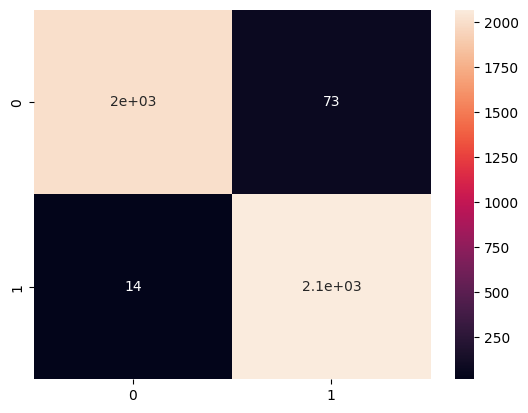

In [ ]:
sns.heatmap(cf_matrix, annot = True)

# Here 73 predicted values shows false positive and 14 predicted values shows false negative
# 2004 predicted values shows true negative and 2069 shows true positive

Predictive system

In [ ]:
X_new = X_test[4]

prediction = model.predict(X_new)

print(prediction)


if(prediction[0]==0):

  print("News is Real")
else:

  print("News is Fake")


[0]
News is Real


In [ ]:
print(X_test[4])

  (0, 15582)	0.11953427224407268
  (0, 9271)	0.3358510804752684
  (0, 9108)	0.3412093036623351
  (0, 8853)	0.359890356291124
  (0, 4992)	0.3375651861385603
  (0, 3676)	0.3192658310642578
  (0, 3561)	0.3254315431282251
  (0, 3034)	0.3254315431282251
  (0, 3024)	0.34518514264345584
  (0, 1358)	0.28306477181072226
